This workbook compares the residual on psi_4 and h. 

In [ ]:
import numpy as np
import sys
from pathlib import Path
notebook_dir = Path().resolve()
sys.path.append(str(notebook_dir.parent))
from bayes_qnm_GP_likelihood.CCE_RD import *
from bayes_qnm_GP_likelihood.likelihood_funcs import *
from bayes_qnm_GP_likelihood.GP_funcs import *
from bayes_qnm_GP_likelihood.utils import *
from bayes_qnm_GP_likelihood.kernel_param_funcs import *
import pickle
import matplotlib.pyplot as plt

In [2]:
ID = '0001'

TRAINING_START_TIME = -10
TRAINING_END_TIME = 100
TIME_STEP = 0.1

In [3]:
h_main = SXS_CCE_RD(ID, zero_time=(2,2), lev = 'Lev5', radius = 'R2', type = 'h')
h_lower = SXS_CCE_RD(ID, zero_time=(2,2), lev = 'Lev4', radius = 'R2', type = 'h')

psi4_main = SXS_CCE_RD(ID, zero_time=(2,2), lev = 'Lev5', radius = 'R2', type = 'psi4')
psi4_lower = SXS_CCE_RD(ID, zero_time=(2,2), lev = 'Lev4', radius = 'R2', type = 'psi4')

news_main = SXS_CCE_RD(ID, zero_time=(2,2), lev = 'Lev5', radius = 'R2', type = 'news')
news_lower = SXS_CCE_RD(ID, zero_time=(2,2), lev = 'Lev4', radius = 'R2', type = 'news')

In [ ]:
plt.plot(h_main.time, h_main.h[(2,2)], label = 'h main')
plt.plot(psi4_main.time, psi4_main.psi4[(2,2)], label = 'psi4 main')
plt.plot(news_main.time, news_main.news[(2,2)], label = 'news main')

In [8]:
h_residual = get_residuals(
    h_main, h_lower, TRAINING_START_TIME, TRAINING_END_TIME, dt=TIME_STEP
)

psi4_residual = get_residuals(
    psi4_main, psi4_lower, TRAINING_START_TIME, TRAINING_END_TIME, dt=TIME_STEP
)

news_residual = get_residuals(
    news_main, news_lower, TRAINING_START_TIME, TRAINING_END_TIME, dt=TIME_STEP
)

In [19]:
analysis_mask = (h_main.times >= TRAINING_START_TIME - 1e-9) & (
        h_main.times < TRAINING_START_TIME + TRAINING_END_TIME - 1e-9
    )

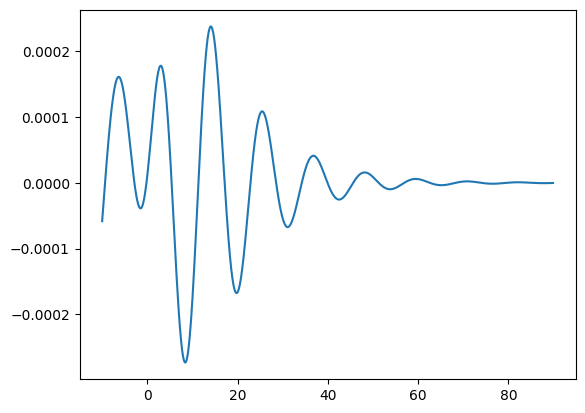

In [20]:
plt.plot(h_main.times[analysis_mask], news_residual[(2,2)], label = 'h residual')